# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


### Project name

In [2]:
name = 'regression_Steel_Fatigue_Strength'

### Thresholds & other parameters

In [3]:
problem_type = 'regression'

In [4]:
data_size = 'small'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.33

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/Steel_Fatigue_Strength_Prediction.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'Fatigue'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [28]:
user_drop_cols = ['Sl. No.']

Dataset before deletion

In [29]:
display(df)

Sl. No.   NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT  ...  \
0          1  885   30    0      0   30    0.0   30.000   0.0   30  ...   
1          2  885   30    0      0   30    0.0   30.000   0.0   30  ...   
2          3  885   30    0      0   30    0.0   30.000   0.0   30  ...   
3          4  885   30    0      0   30    0.0   30.000   0.0   30  ...   
4          5  885   30    0      0   30    0.0   30.000   0.0   30  ...   
..       ...  ...  ...  ...    ...  ...    ...      ...   ...  ...  ...   
432      433  930   30    0      0  930  340.2  895.812  70.2  140  ...   
433      434  930   30    0      0  930  340.2  895.812  70.2  140  ...   
434      435  930   30    0      0  930  340.2  895.812  70.2   60  ...   
435      436  930   30    0      0  930  340.2  895.812  70.2   60  ...   
436      437  930   30    0      0  930  340.2  895.812  70.2   60  ...   

         S    Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  Fatigue  
0    0.022  0.01  0.02  0.01  0.00       825  0.070  0.020  0.040      232  
1    0.017  0.08  0.12  0.08  0.00       610  0.110  0.000  0.040      235  
2    0.015  0.02  0.03  0.01  0.00      1270  0.070  0.020  0.000      235  
3    0.024  0.01  0.02  0.01  0.00      1740  0.060  0.000  0.000      241  
4    0.022  0.01  0.02  0.02  0.00       825  0.040  0.020  0.000      225  
..     ...   ...   ...   ...   ...       ...    ...    ...    ...      ...  
432  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000     1030  
433  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008      957  
434  0.019  0.06  1.17  0.07  0.17       690  0.080  0.000  0.000     1104  
435  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000     1008  
436  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008      882  

[437 rows x 27 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

No duplicate rows.


Drop all the rows for which the target is NaN

In [32]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [33]:
display(df)

NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT   TT  ...      S  \
0    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.022   
1    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.017   
2    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.015   
3    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.024   
4    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.022   
..   ...  ...  ...    ...  ...    ...      ...   ...  ...  ...  ...    ...   
432  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.024   
433  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.015   
434  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.019   
435  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.024   
436  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.015   

       Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  Fatigue  
0    0.01  0.02  0.01  0.00       825  0.070  0.020  0.040      232  
1    0.08  0.12  0.08  0.00       610  0.110  0.000  0.040      235  
2    0.02  0.03  0.01  0.00      1270  0.070  0.020  0.000      235  
3    0.01  0.02  0.01  0.00      1740  0.060  0.000  0.000      241  
4    0.01  0.02  0.02  0.00       825  0.040  0.020  0.000      225  
..    ...   ...   ...   ...       ...    ...    ...    ...      ...  
432  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000     1030  
433  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008      957  
434  0.06  1.17  0.07  0.17       690  0.080  0.000  0.000     1104  
435  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000     1008  
436  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008      882  

[437 rows x 26 columns]

### Dataset copy

In [34]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

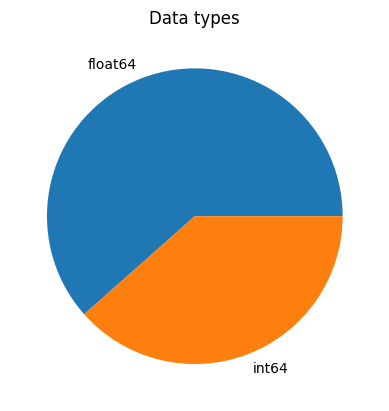

In [35]:
plot_dataframe_structure(df)

### Dataframe statistics

In [36]:
display(df.describe().T)

count        mean         std      min      25%      50%       75%  \
NT        437.0  872.299771   26.212073  825.000  865.000  870.000   870.000   
THT       437.0  737.643021  280.036541   30.000  845.000  845.000   855.000   
THt       437.0   25.949657   10.263824    0.000   30.000   30.000    30.000   
THQCr     437.0   10.654462    7.841437    0.000    8.000    8.000     8.000   
CT        437.0  128.855835  281.743539   30.000   30.000   30.000    30.000   
Ct        437.0   40.502059  126.924697    0.000    0.000    0.000     0.000   
DT        437.0  123.699844  267.128933   30.000   30.000   30.000    30.000   
Dt        437.0    4.843936   15.700076    0.000    0.000    0.000     0.000   
QmT       437.0   35.491991   19.419277   30.000   30.000   30.000    30.000   
TT        437.0  536.842105  164.101963   30.000  550.000  600.000   650.000   
Tt        437.0   65.080092   21.477650    0.000   60.000   60.000    60.000   
TCr       437.0   20.814645    8.072207    0.000   24.000   24.000    24.000   
C         437.0    0.388398    0.096364    0.170    0.340    0.400     0.430   
Si        437.0    0.299588    0.246045    0.160    0.240    0.260     0.290   
Mn        437.0    0.823021    0.279028    0.370    0.700    0.760     0.800   
P         437.0    0.015785    0.005205    0.002    0.012    0.016     0.019   
S         437.0    0.014611    0.006145    0.003    0.010    0.015     0.019   
Ni        437.0    0.517048    0.852976    0.010    0.020    0.060     0.460   
Cr        437.0    0.570458    0.411769    0.010    0.120    0.710     0.980   
Cu        437.0    0.067780    0.049161    0.010    0.020    0.060     0.100   
Mo        437.0    0.069794    0.088124    0.000    0.000    0.000     0.170   
RedRatio  437.0  923.629291  576.617020  240.000  590.000  740.000  1228.000   
dA        437.0    0.047181    0.031093    0.000    0.020    0.040     0.070   
dB        437.0    0.003391    0.008240    0.000    0.000    0.000     0.000   
dC        437.0    0.007712    0.010418    0.000    0.000    0.000     0.010   
Fatigue   437.0  552.903890  186.630528  225.000  448.000  505.000   578.000   

               max  
NT         930.000  
THT        865.000  
THt         30.000  
THQCr       24.000  
CT         930.000  
Ct         540.000  
DT         903.333  
Dt          70.200  
QmT        140.000  
TT         680.000  
Tt         120.000  
TCr         24.000  
C            0.630  
Si           2.050  
Mn           1.600  
P            0.031  
S            0.030  
Ni           2.780  
Cr           1.170  
Cu           0.260  
Mo           0.240  
RedRatio  5530.000  
dA           0.130  
dB           0.050  
dC           0.058  
Fatigue   1190.000

## Which columns could be categorical ?

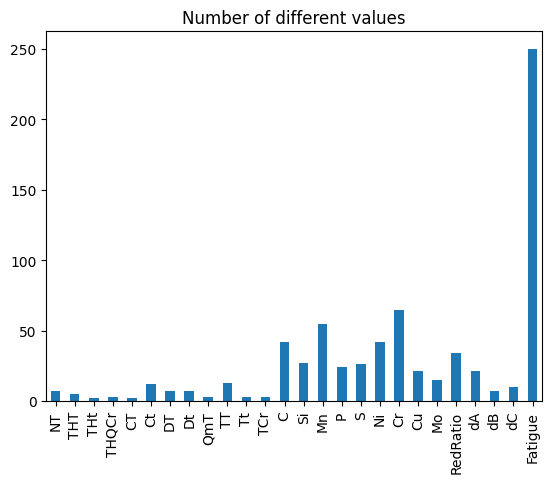

In [37]:
plot_categorical(df)

## Dataset Cleaning

### Drop NaN:

In [38]:
df, drop_cols = drop_na(df, target_col, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [39]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [40]:
display(dropped_cols)

array(['Sl. No.'], dtype='<U32')

### Encoding data:

In [41]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: NT
Column  THT  is categorical.
Column  THt  is categorical.
Column  THQCr  is categorical.
Column  CT  is categorical.
Encoding numeric column: Ct
Encoding numeric column: DT
Encoding numeric column: Dt
Column  QmT  is categorical.
Encoding numeric column: TT
Column  Tt  is categorical.
Column  TCr  is categorical.
Encoding numeric column: C
Encoding numeric column: Si
Encoding numeric column: Mn
Encoding numeric column: P
Encoding numeric column: S
Encoding numeric column: Ni
Encoding numeric column: Cr
Encoding numeric column: Cu
Encoding numeric column: Mo
Encoding numeric column: RedRatio
Encoding numeric column: dA
Encoding numeric column: dB
Encoding numeric column: dC
Encoding numeric column: Fatigue


### Imputing NaN using IterativeImputer

#### Imputation

In [42]:
df = imputation(df)

No need to impute data.


### Data compression:

In [43]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.09MB
Memory usage after optimization is: 0.02MB
Decreased by 76.3%


#### Dataframe structure after compression

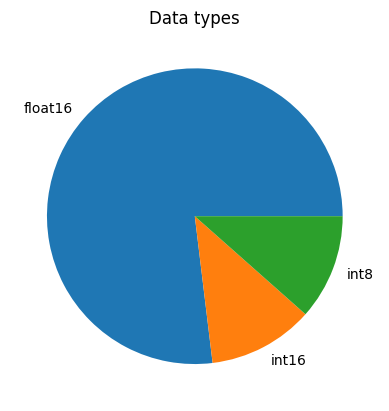

In [44]:
plot_dataframe_structure(df)

### Outliers:

In [45]:
df = outliers(df, threshold_Z)

Using Z_score,  87  rows will be suppressed.


### Correlation according to Pearson

In [46]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [47]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Check columns that should be dropped

In [48]:
print(dropped_cols)

['CT' 'QmT' 'TCr' 'Tt']


### Correlation according to Spearman (hierarchical clustering)

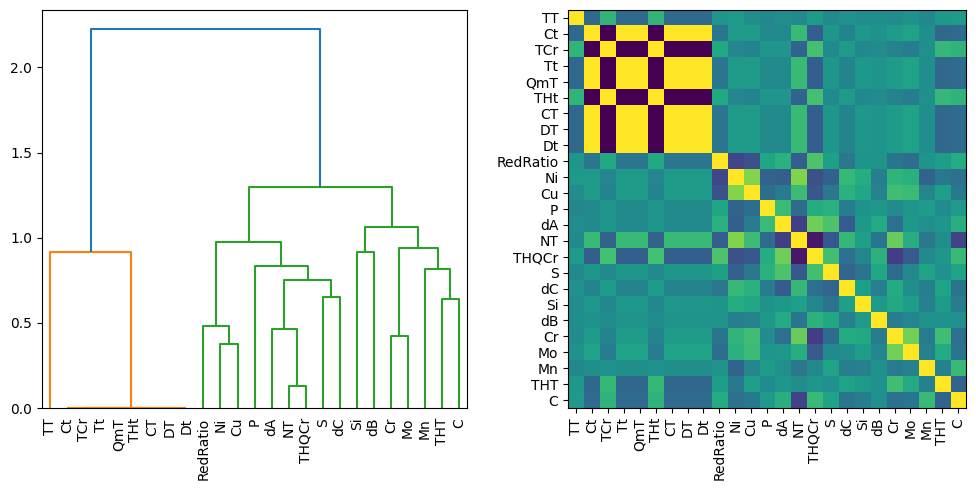

cluster_ids =  [2 4 1 2 1 1 1 1 1 1 1 1 4 3 4 2 2 2 4 2 4 2 2 3 2]
selected_features_names =  ['NT', 'THT', 'THt', 'Si']


In [49]:
selected_features_names = hierarchical_clustering(df.drop(target_col, axis=1), t=1) 
print('selected_features_names = ', selected_features_names)

# Splitting

In [50]:
df = df_copy

## Splitting dataframe in features and targets

In [51]:
y = df[target_col]

In [52]:
X = df.drop(target_col, axis=1)

### Dimensions

In [53]:
nb_features = len(X.columns.tolist())

In [54]:
nb_targets = 1

In [55]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [56]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [57]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [58]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [59]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [60]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [61]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [62]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [63]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [64]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error', random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ]

#### Level-1 model

In [65]:
level_1 = Ridge(alpha=1, positive=True, random_state = random_state)

#### Stacking for regression

In [66]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [67]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 

CPU times: user 328 ms, sys: 115 ms, total: 443 ms
Wall time: 30 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0           NT
5           Ct
6           DT
7           Dt
9           TT
12           C
13          Si
14          Mn
15           P
16           S
17          Ni
18          Cr
19          Cu
20          Mo
21    RedRatio
22          dA
23          dB
24          dC
Name: column_name, dtype: object),...
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 1       THT
2       THt
3     THQCr
4        CT
8       QmT
10       Tt
11      TCr
Name: column_name, dtype: object)])),
                                               ('svr', SVR())]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Model evaluation

### Model scoring

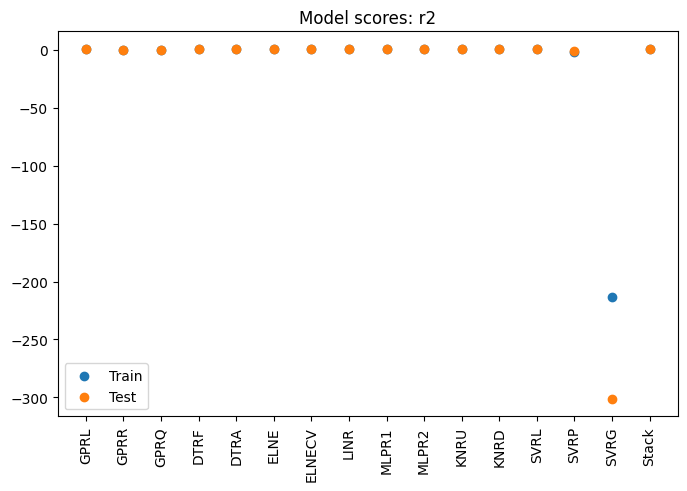

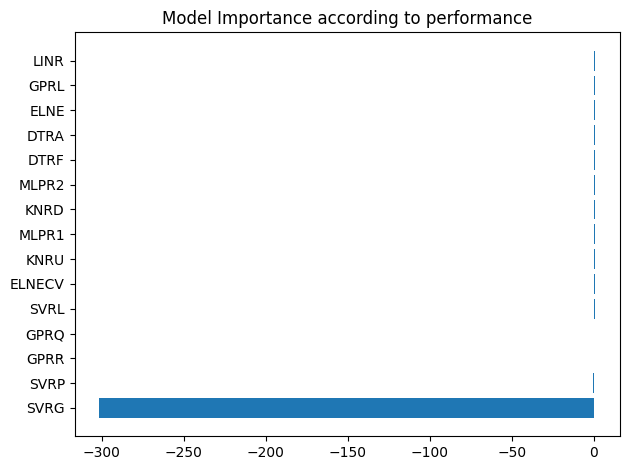

In [68]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### $R^2$ score

In [69]:
K_r2(model,X_train, y_train, X_test, y_test)

## Model inspection

### Model importance

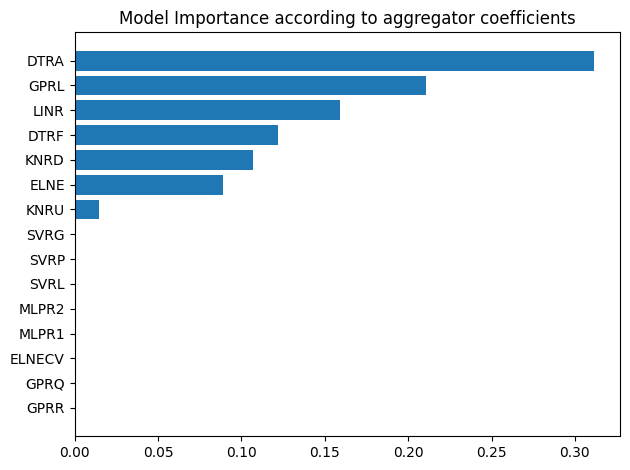

In [70]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

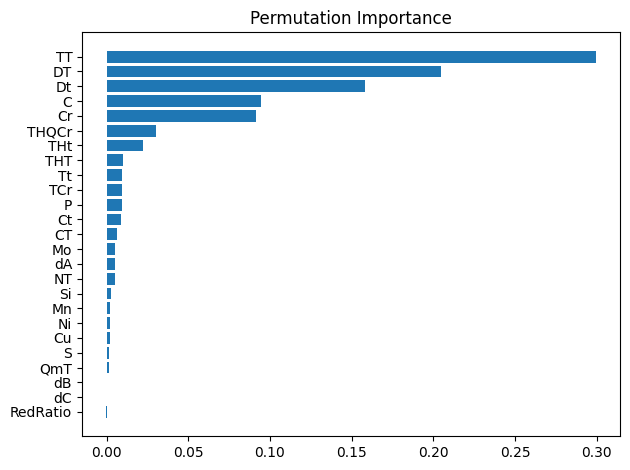

In [71]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [72]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [73]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [74]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 101 ms, sys: 2.01 ms, total: 103 ms
Wall time: 3.04 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0           NT
5           Ct
6           DT
7           Dt
9           TT
12           C
13          Si
14          Mn
15           P
16           S
17          Ni
18          Cr
19          Cu
20          Mo
21    RedRatio
22          dA
23          dB
24          dC
Name: column_name, dtype: object),...
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 1       THT
2       THt
3     THQCr
4        CT
8       QmT
10       Tt
11      TCr
Name: column_name, dtype: object)])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

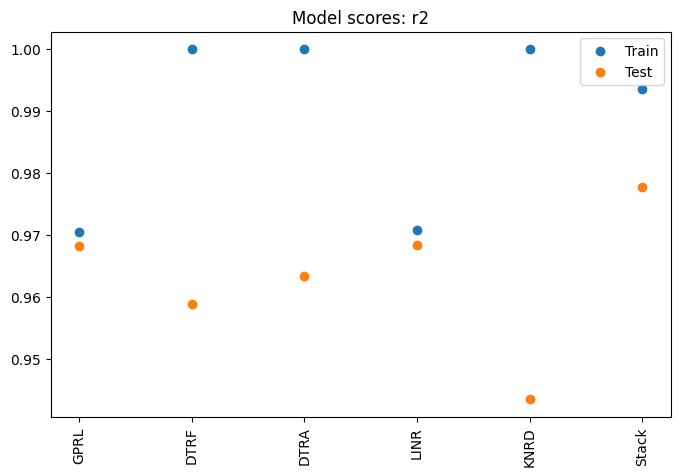

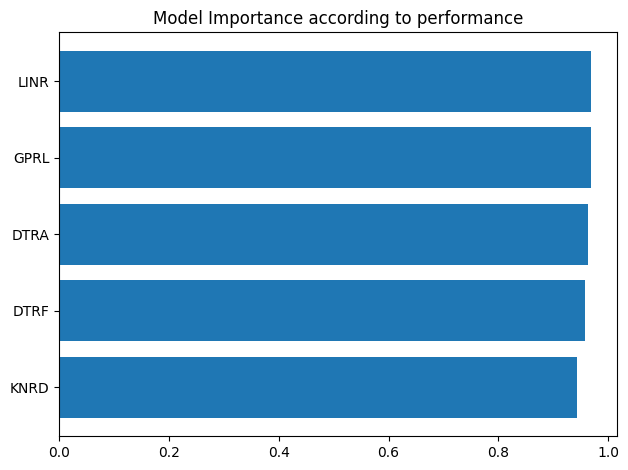

In [75]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered $R^2$ score

In [76]:
K_r2(model,X_train, y_train, X_test, y_test)

## Filtered Model inspection

### Filtered Model importance

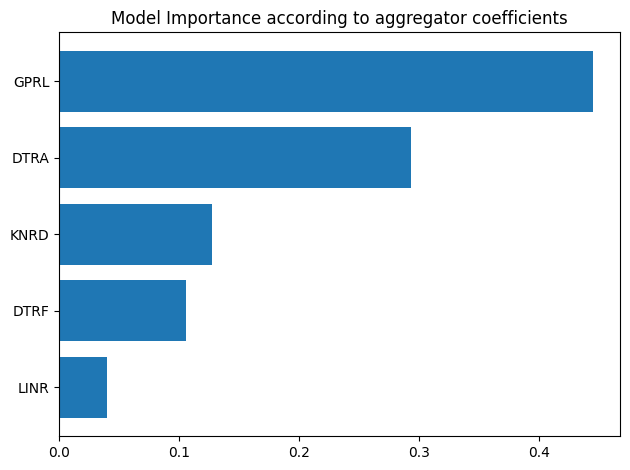

In [77]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

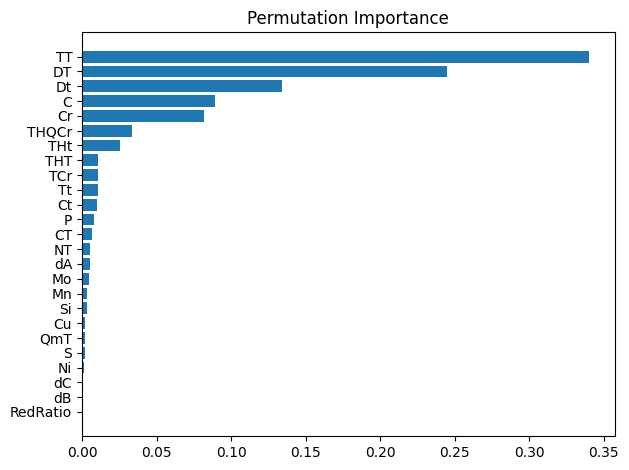

In [78]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [79]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [80]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [81]:
print(dropped_cols)

['CT', 'Ct', 'Cu', 'Mn', 'Mo', 'NT', 'Ni', 'P', 'QmT', 'RedRatio', 'S', 'Si', 'TCr', 'THQCr', 'THT', 'THt', 'Tt', 'dA', 'dB', 'dC']


# Modeling: Final model

In [82]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [83]:
reduce_schema('column_name', dropped_cols)

## Splitting

### Splitting dataframe in features and targets

In [84]:
y = df[target_col] 

In [85]:
X = df.drop(target_col, axis=1) 

### Dimensions

In [86]:
nb_features = len(X.columns.tolist()) 

In [87]:
nb_targets = 1 

In [88]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [89]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Final model building

#### Select the categorical and numerical columns

In [90]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [91]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [92]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [93]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [94]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [95]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [96]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [97]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error', random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ]

In [98]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [99]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [100]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 82.6 ms, sys: 3.44 ms, total: 86 ms
Wall time: 1.93 s


StackingRegressor(estimators=[('DTRA',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42))]),
                                                                                 0    DT
1    Dt
2    TT
3     C
4    Cr
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('or...
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 Series([], Name: column_name, dtype: object))])),
                                               ('linearregression',
                                                LinearRegression())]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Final Model evaluation

### Final Model scoring

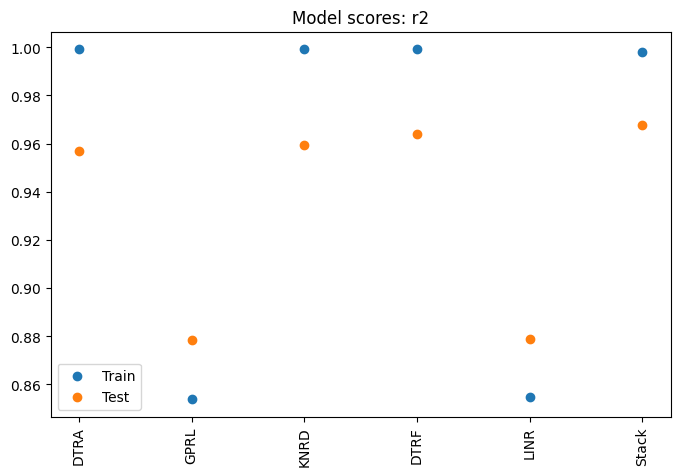

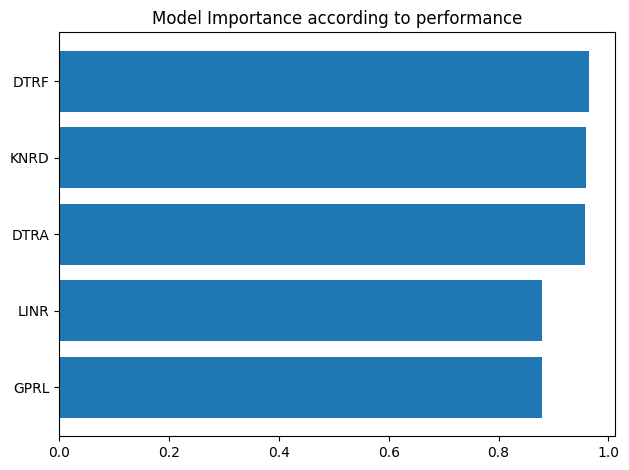

In [101]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

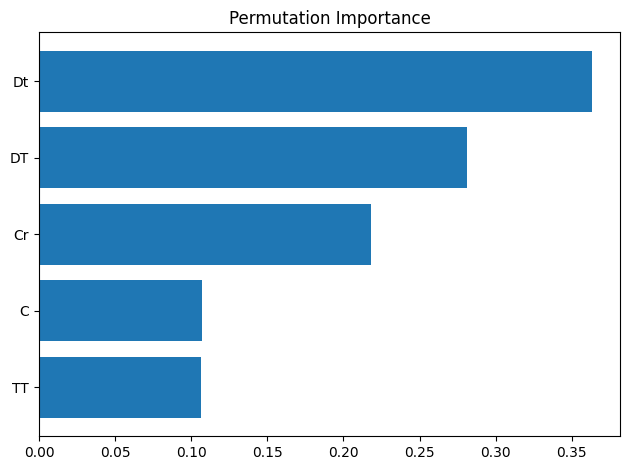

In [102]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [103]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final $R^2$ score

In [104]:
K_r2(model,X_train, y_train, X_test, y_test)

## Final Model inspection

### Final Model importance

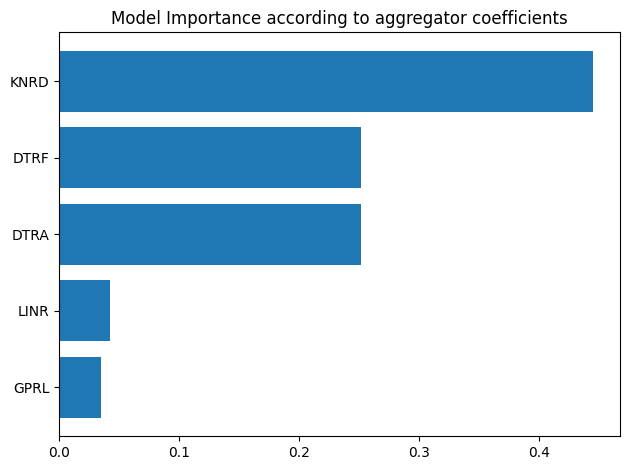

In [105]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

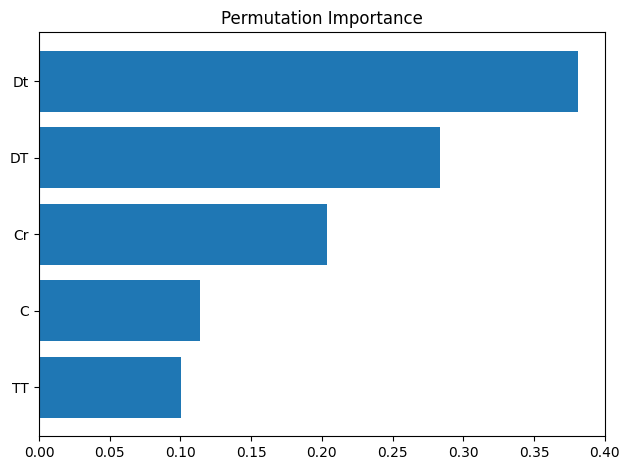

array([['TT', 0.10065672504624164],
       ['C', 0.11361342061722021],
       ['Cr', 0.20374739964371197],
       ['DT', 0.2837169868695078],
       ['Dt', 0.3809887438055911]], dtype=object)

In [106]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [107]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU)

interactive(children=(Dropdown(description='feature', options=('DT', 'Dt', 'TT', 'C', 'Cr'), value='DT'), Outp…

# Test & Deployment

### Save the model

In [108]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [109]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [110]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)